In [ ]:
# !pip install torch==1.8.1+cu111 torchvision==0.9.1+cu111 torchaudio===0.8.1 -f https://download.pytorch.org/whl/lts/1.8/torch_lts.html
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2
import pandas as pd

In [ ]:
hand_model = torch.hub.load('ultralytics/yolov5', 'custom', path= r"C:\Users\there.DESKTOP-CKI66IV\Documents\GitHub\Fencing-Pose-Classification\PD Python Integration\isolated hand and foil.pt", force_reload=True)
hand_model.max_det = 1
hand_model.conf = 0.4


In [ ]:
foil_model = torch.hub.load('ultralytics/yolov5', 'custom', path= r"C:\Users\there.DESKTOP-CKI66IV\Documents\GitHub\Fencing-Pose-Classification\PD Python Integration\isolated hand medium.pt", force_reload=True)
foil_model.max_det = 1
foil_model.conf = 0.01


c:\Users\there.DESKTOP-CKI66IV\Documents\GitHub\Fencing-Pose-Classification\venv\lib\site-packages\torch\autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
c:\Users\there.DESKTOP-CKI66IV\Documents\GitHub\Fencing-Pose-Classification\venv\lib\site-packages\torch\autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


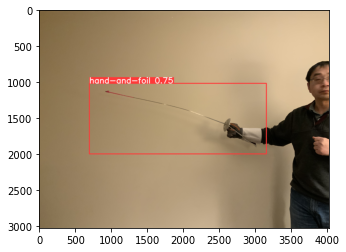

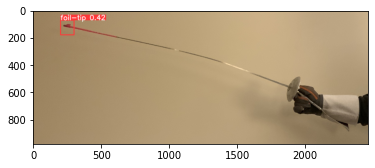

In [15]:
img = r"C:\Users\there.DESKTOP-CKI66IV\Documents\GitHub\Fencing-Pose-Classification\PD Python Integration\More yolo training\20220204_021749395_iOS.jpg"
results = hand_model(img)


df_hand = results.pandas().xyxy[0]

img = cv2.imread(r"C:\Users\there.DESKTOP-CKI66IV\Documents\GitHub\Fencing-Pose-Classification\PD Python Integration\More yolo training\20220204_021749395_iOS.jpg")
xmin = int(df_hand.iloc[0,0])
xmax= int(df_hand.iloc[0,2])
ymin = int(df_hand.iloc[0,1])
ymax = int(df_hand.iloc[0,3])

# cropped = img[xmin:xmax, ymin:ymax]
cropped = img[ymin:ymax, xmin:xmax]
cv2.imwrite("cropped.jpg", cropped)
cropped = r"C:\Users\there.DESKTOP-CKI66IV\Documents\GitHub\Fencing-Pose-Classification\PD Python Integration\cropped.jpg"
results2 = foil_model(cropped)


%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()
plt.imshow(np.squeeze(results2.render()))
plt.show()

In [ ]:
####CROPPPING


img = cv2.imread(r"C:\Users\there.DESKTOP-CKI66IV\Documents\GitHub\Fencing-Pose-Classification\PD Python Integration\More yolo training\20220204_021749395_iOS.jpg")
results = hand_model(img)

df_hand = results.pandas().xyxy[0]
df_hand.iloc[0]

xmin = int(df_hand.iloc[0,0])
xmax= int(df_hand.iloc[0,2])
ymin = int(df_hand.iloc[0,1])
ymax = int(df_hand.iloc[0,3])

cropped = img[ymin:ymax, xmin:xmax]
cv2.imshow("cropped",cropped)
cv2.waitKey(0)
cv2.destroyAllWindows()





In [ ]:
def writeVelocityLine(master_position, i):
    temp = i-11
    while(temp < i):
        
        #WRITE VELOCITY LINE 
        if (master_position[temp] is not None and master_position[temp+1] is not None):   
            cv2.line(frame, tuple(master_position[temp]),tuple(master_position[temp+1]), (0,255,0), 4)

            # tuple(master_position[temp+1])
        temp+=1

In [ ]:
# cap = cv2.VideoCapture(0)
cap = cv2.VideoCapture(r"C:\Users\there.DESKTOP-CKI66IV\Pictures\Camera Roll\WIN_20220204_02_22_06_Pro.mp4")
i = 0
i_hand = pd.DataFrame()
i_tip = pd.DataFrame()
master_person = []

# video_fps = cap.get(cv2.CAP_PROP_FPS),
# height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
# width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)

# fourcc = cv2.VideoWriter_fourcc(*'XVID')
# out = cv2.VideoWriter('1.avi', fourcc, video_fps[0], (int(width), int(height)))


while cap.isOpened():

        
    ret, frame = cap.read()
    
    # Make detections 
    results = hand_model(frame)


    # Results - parsing
    

    df_hand = results.pandas().xyxy[0]
    df_hand.iloc[0]

    xmin = int(df_hand.iloc[0,0])
    xmax= int(df_hand.iloc[0,2])
    ymin = int(df_hand.iloc[0,1])
    ymax = int(df_hand.iloc[0,3])

    cropped = img[xmin:xmax, ymin:ymax]

    tip_result = foil_model(cropped)



    df_results = results.pandas().xyxy[0]
    df_tip = df_results.loc[df_results['class'] == 0]
    if not df_tip.empty:
        centers = []
        temp = df_tip.iloc[0]
        x1 = temp.loc["xmin"]
        y1 = temp.loc["ymin"]
        x2 = temp.loc["xmax"]
        y2 = temp.loc["ymax"]
        center_x = (x1+x2)/2
        center_y =  (y1+y2)/2
        
        i_tip = [int(center_x), int(center_y)]
    else:
        i_tip = None
    

    master_person.append(i_tip)


    frame = np.squeeze(results.render())
    if (i > 11):
        writeVelocityLine(master_person, i)
   

    
    cv2.imshow('YOLO', frame)
    # out.write(frame)
    i+=1
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

In [14]:

cap = cv2.VideoCapture(r"C:\Users\there.DESKTOP-CKI66IV\Documents\GitHub\Fencing-Pose-Classification\PD Python Integration\unprocessed.MOV")
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH )) 
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT ))
 
while cap.isOpened():

        
    ret, frame = cap.read()
    
    results = hand_model(frame)
    

    df_hand = results.pandas().xyxy[0]
    

    if not df_hand.empty:
        df_hand.iloc[0]
        xmin = int(df_hand.iloc[0,0])
        xmax= int(df_hand.iloc[0,2])
        ymin = int(df_hand.iloc[0,1])
        ymax = int(df_hand.iloc[0,3])

        cropped = frame[ymin:ymax, xmin:xmax]
        # cropped = cv2.resize(cropped, (width, height))

        tip_result = foil_model(cropped)
        df_tip = tip_result.pandas().xyxy[0]
        if not df_tip.empty:
            temp = df_tip.iloc[0]
            x1 = temp.loc["xmin"]
            y1 = temp.loc["ymin"]
            x2 = temp.loc["xmax"]
            y2 = temp.loc["ymax"]
            center_x = (int)((x1+x2)/2)
            center_y =  (int)((y1+y2)/2)
            cv2.circle(frame, (center_x, center_y), 30, (0,0,255), -1)


        frame = np.squeeze(tip_result.render())

    else: 
        frame = np.squeeze(results.render())
    cv2.imshow('YOLO', frame)

    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

c:\Users\there.DESKTOP-CKI66IV\Documents\GitHub\Fencing-Pose-Classification\venv\lib\site-packages\torch\autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
c:\Users\there.DESKTOP-CKI66IV\Documents\GitHub\Fencing-Pose-Classification\venv\lib\site-packages\torch\autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
c:\Users\there.DESKTOP-CKI66IV\Documents\GitHub\Fencing-Pose-Classification\venv\lib\site-packages\torch\autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
c:\Users\there.DESKTOP-CKI66IV\Documents\GitHub\Fencing-Pose-Classificati

In [ ]:
master_person
